### LIBRARIES

In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random  
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.utils import resample
from collections import Counter

### DATASET

In [28]:
import numpy as np
import pandas as pd

n = 200

age = np.random.randint(18, 65, size=n)
income = np.random.normal(60000, 15000, size=n).clip(20000, 150000).astype(int)
time_on_site = np.round(np.random.normal(5, 2, size=n).clip(1, 15), 1)
items_viewed = np.random.randint(1, 40, size=n)
cart_additions = np.random.randint(0, 10, size=n)
previous_purchases = np.random.randint(0, 20, size=n)
discount_used = np.random.randint(0, 2, size=n)

# Yes / No labels
labels = np.array(['yes'] * 130 + ['no'] * 70)
np.random.shuffle(labels)

# Final DataFrame
df = pd.DataFrame({
    'age': age,
    'income': income,
    'time_on_site': time_on_site,
    'items_viewed': items_viewed,
    'cart_additions': cart_additions,
    'previous_purchases': previous_purchases,
    'discount_used': discount_used,
    'buy_label': labels
})

df.head()


,age,income,time_on_site,items_viewed,cart_additions,previous_purchases,discount_used,buy_label
0,30,81260,4.3,32,3,4,1,no
1,59,81155,6.6,24,4,17,1,no
2,39,52700,6.9,12,9,3,0,no
3,22,60536,5.6,33,6,18,1,no
4,33,49714,3.0,30,2,11,0,yes


### READ CSV FILE

In [29]:
df.to_csv("mydataset.csv", index=False)

In [30]:
df = pd.read_csv("mydataset.csv")
df.head(6)

,age,income,time_on_site,items_viewed,cart_additions,previous_purchases,discount_used,buy_label
0,30,81260,4.3,32,3,4,1,no
1,59,81155,6.6,24,4,17,1,no
2,39,52700,6.9,12,9,3,0,no
3,22,60536,5.6,33,6,18,1,no
4,33,49714,3.0,30,2,11,0,yes
5,31,68171,9.3,14,1,7,1,yes


### INTRODUCE MISSING VALUES , DUPLICATE , SHUFFLE

In [31]:
for col in df.columns:
    df.loc[np.random.choice(df.index, 3 , replace = False),col] =np.nan
    
df = pd.concat([df,df.sample(10)],ignore_index = True) # Missing values
df = pd.concat([df, df], ignore_index=True)      # Duplicate
df = df.sample(frac=1 ,random_state = 42).reset_index(drop = True) # Shuffle

df.head(5)


,age,income,time_on_site,items_viewed,cart_additions,previous_purchases,discount_used,buy_label
0,38.0,62115.0,1.0,35.0,9.0,15.0,0.0,yes
1,46.0,73500.0,3.1,18.0,6.0,NaN,0.0,no
2,18.0,39715.0,6.4,21.0,2.0,1.0,1.0,no
3,35.0,54454.0,7.7,13.0,6.0,16.0,0.0,yes
4,35.0,66662.0,2.7,18.0,6.0,10.0,1.0,yes


# EDA

In [32]:
print("Shape:")
df.shape

Shape:


(420, 8)

In [33]:
print("----Missing Values per Columns----")
df.isnull().sum()

----Missing Values per Columns----


age                   6
income                6
time_on_site          6
items_viewed          8
cart_additions        6
previous_purchases    6
discount_used         6
buy_label             6
dtype: int64

In [34]:
print("INFO :")
df.info()

INFO :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 414 non-null    float64
 1   income              414 non-null    float64
 2   time_on_site        414 non-null    float64
 3   items_viewed        412 non-null    float64
 4   cart_additions      414 non-null    float64
 5   previous_purchases  414 non-null    float64
 6   discount_used       414 non-null    float64
 7   buy_label           414 non-null    object 
dtypes: float64(7), object(1)
memory usage: 26.4+ KB


In [35]:
print("-----Number of dupliactes-----")
df.duplicated().sum()

-----Number of dupliactes-----


np.int64(220)

In [36]:
df.describe()

,age,income,time_on_site,items_viewed,cart_additions,previous_purchases,discount_used
count,414.000000,414.000000,414.000000,412.000000,414.000000,414.000000,414.000000
mean,39.256039,60757.623188,4.974396,19.407767,4.541063,9.884058,0.541063
std,13.285363,15657.888046,2.074023,11.313224,2.689231,5.680440,0.498914
min,18.000000,26097.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,28.000000,49744.000000,3.425000,9.000000,2.000000,5.000000,0.000000
50%,39.000000,60513.000000,5.000000,19.000000,5.000000,10.000000,1.000000
75%,50.000000,70427.750000,6.375000,30.000000,7.000000,15.000000,1.000000
max,64.000000,117005.000000,10.600000,39.000000,9.000000,19.000000,1.000000


In [37]:
print("Label distribution:")
print(df['buy_label'].value_counts())


Label distribution:
buy_label
yes    266
no     148
Name: count, dtype: int64


## MATPLOTLIB 

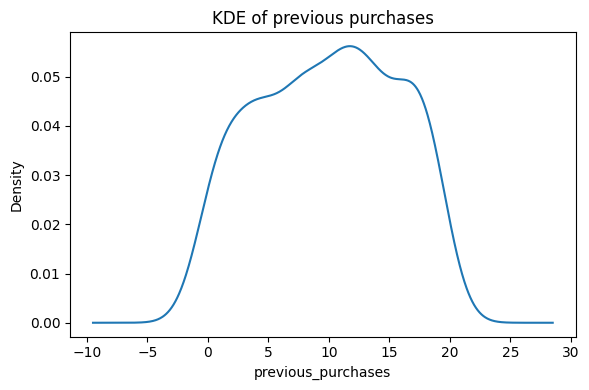

In [38]:
plt.figure(figsize=(6,4))
plt.title('KDE of previous purchases')
# Drop NaN for the column
col = 'previous_purchases'
try:
    import scipy.stats as stats 
except Exception:
    pass

df[col].plot(kind='kde')
plt.xlabel(col)
plt.tight_layout()
plt.show()

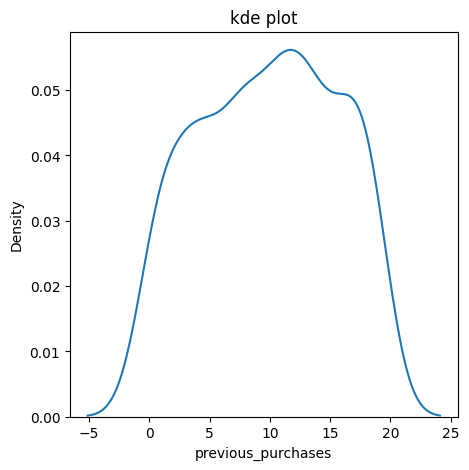

In [39]:
plt.figure(figsize =(5,5))
sns.kdeplot(df["previous_purchases"])
plt.title("kde plot")
plt.show()

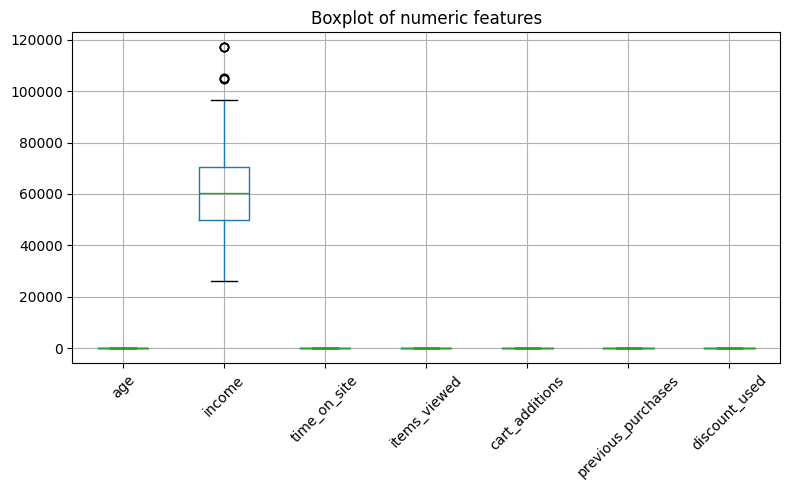

In [40]:
plt.figure(figsize=(8,5))
plt.title('Boxplot of numeric features')
df.drop(columns=["buy_label"]).boxplot(rot=45)  #Imbalance
plt.tight_layout()
plt.show()

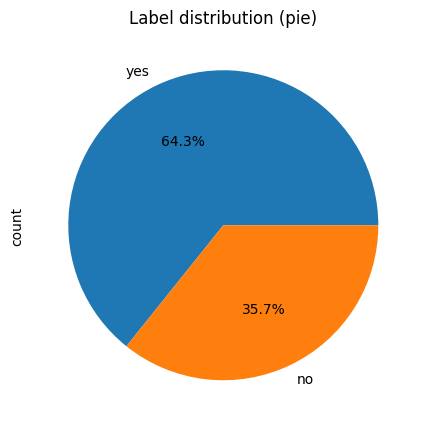

In [41]:
plt.figure(figsize=(5,7))
plt.title('Label distribution (pie)')
df["buy_label"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.show()

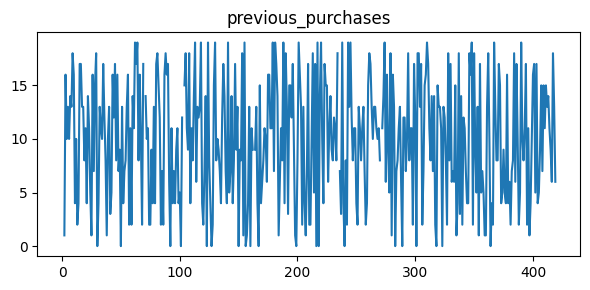

In [42]:
plt.figure(figsize=(6,3))
plt.title('previous_purchases')
plt.plot(df['previous_purchases'].reset_index(drop=True))
plt.tight_layout()
plt.show()

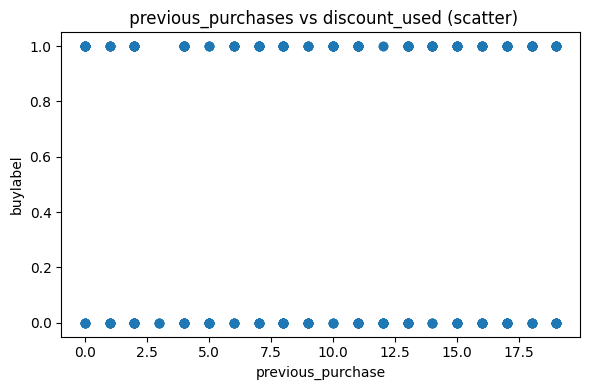

In [43]:
plt.figure(figsize=(6,4))
plt.title(' previous_purchases vs discount_used (scatter)')
plt.scatter(df['previous_purchases'], df['discount_used'])
plt.xlabel('previous_purchase')
plt.ylabel('buylabel')
plt.tight_layout()
plt.show()

## HANDEL MISSING VALUES

In [44]:
df['previous_purchases'].fillna(df['previous_purchases'].mode()[0], inplace=True)
df['buy_label'].fillna(df['buy_label'].mode(), inplace=True)
df.isnull().sum()

C:\Users\MS\AppData\Local\Temp\ipykernel_13704\991545957.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['buy_label'].fillna(df['buy_label'].mode(), inplace=True)


age                   6
income                6
time_on_site          6
items_viewed          8
cart_additions        6
previous_purchases    0
discount_used         6
buy_label             6
dtype: int64

## DROP DUPLICATES

In [45]:
df = df.drop_duplicates().reset_index(drop=True)
print(f'Duplicates after: {df.duplicated().sum()}')

Duplicates after: 0


## ENCODING LABELS

In [46]:
X = df.drop(columns =['buy_label'])
y = df['buy_label'].map({'yes':1,'no':0})

# Impute missing values using sklearn SimpleImputer

In [47]:
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("\nMissing values AFTER imputation:")
print(X_imputed.isnull().sum().sum())


Missing values AFTER imputation:
0


### NORMALIZATION

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

print('\nSample of scaled features:')
print(X_scaled.head())


Sample of scaled features:
        age    income  time_on_site  items_viewed  cart_additions  \
0  0.434783  0.396203      0.000000      0.894737        1.000000   
1  0.608696  0.521439      0.218750      0.447368        0.666667   
2  0.000000  0.149800      0.562500      0.526316        0.222222   
3  0.369565  0.311931      0.697917      0.315789        0.666667   
4  0.369565  0.446220      0.177083      0.447368        0.666667   

   previous_purchases  discount_used  
0            0.789474            0.0  
1            0.210526            0.0  
2            0.052632            1.0  
3            0.842105            0.0  
4            0.526316            1.0  


#  Rebuild cleaned DataFrame for plotting and balancing

In [49]:
clean_df = X_scaled.copy()
clean_df['buy_label'] = y.values

# Show cleaned seaborn plots

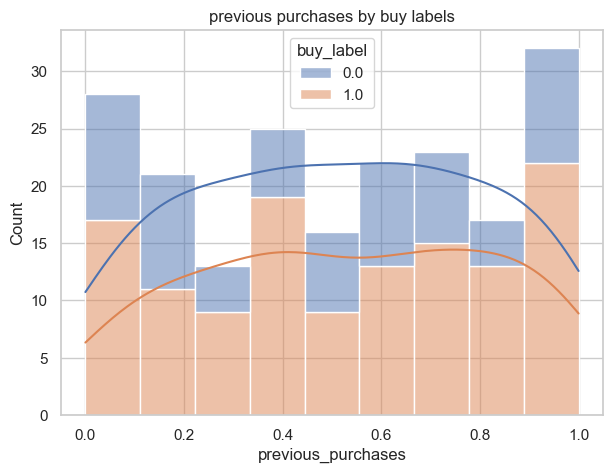

In [50]:
import seaborn as sns
sns.set(style='whitegrid')

plt.figure(figsize =(7,5))
sns.histplot(data=clean_df, x="previous_purchases" ,hue="buy_label", kde = True , multiple ='stack') # Balance
plt.title('previous purchases by buy labels')
plt.tight_layout
plt.show()

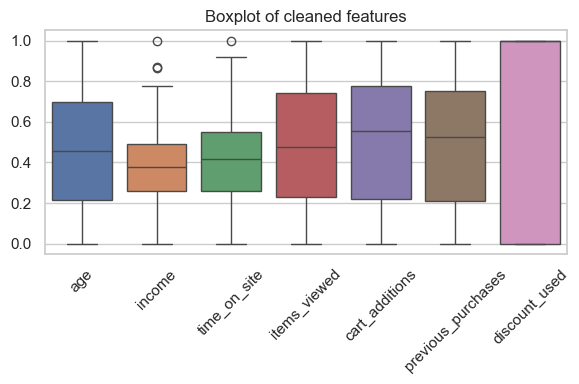

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(data=clean_df.drop(columns=['buy_label']))
plt.title('Boxplot of cleaned features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)


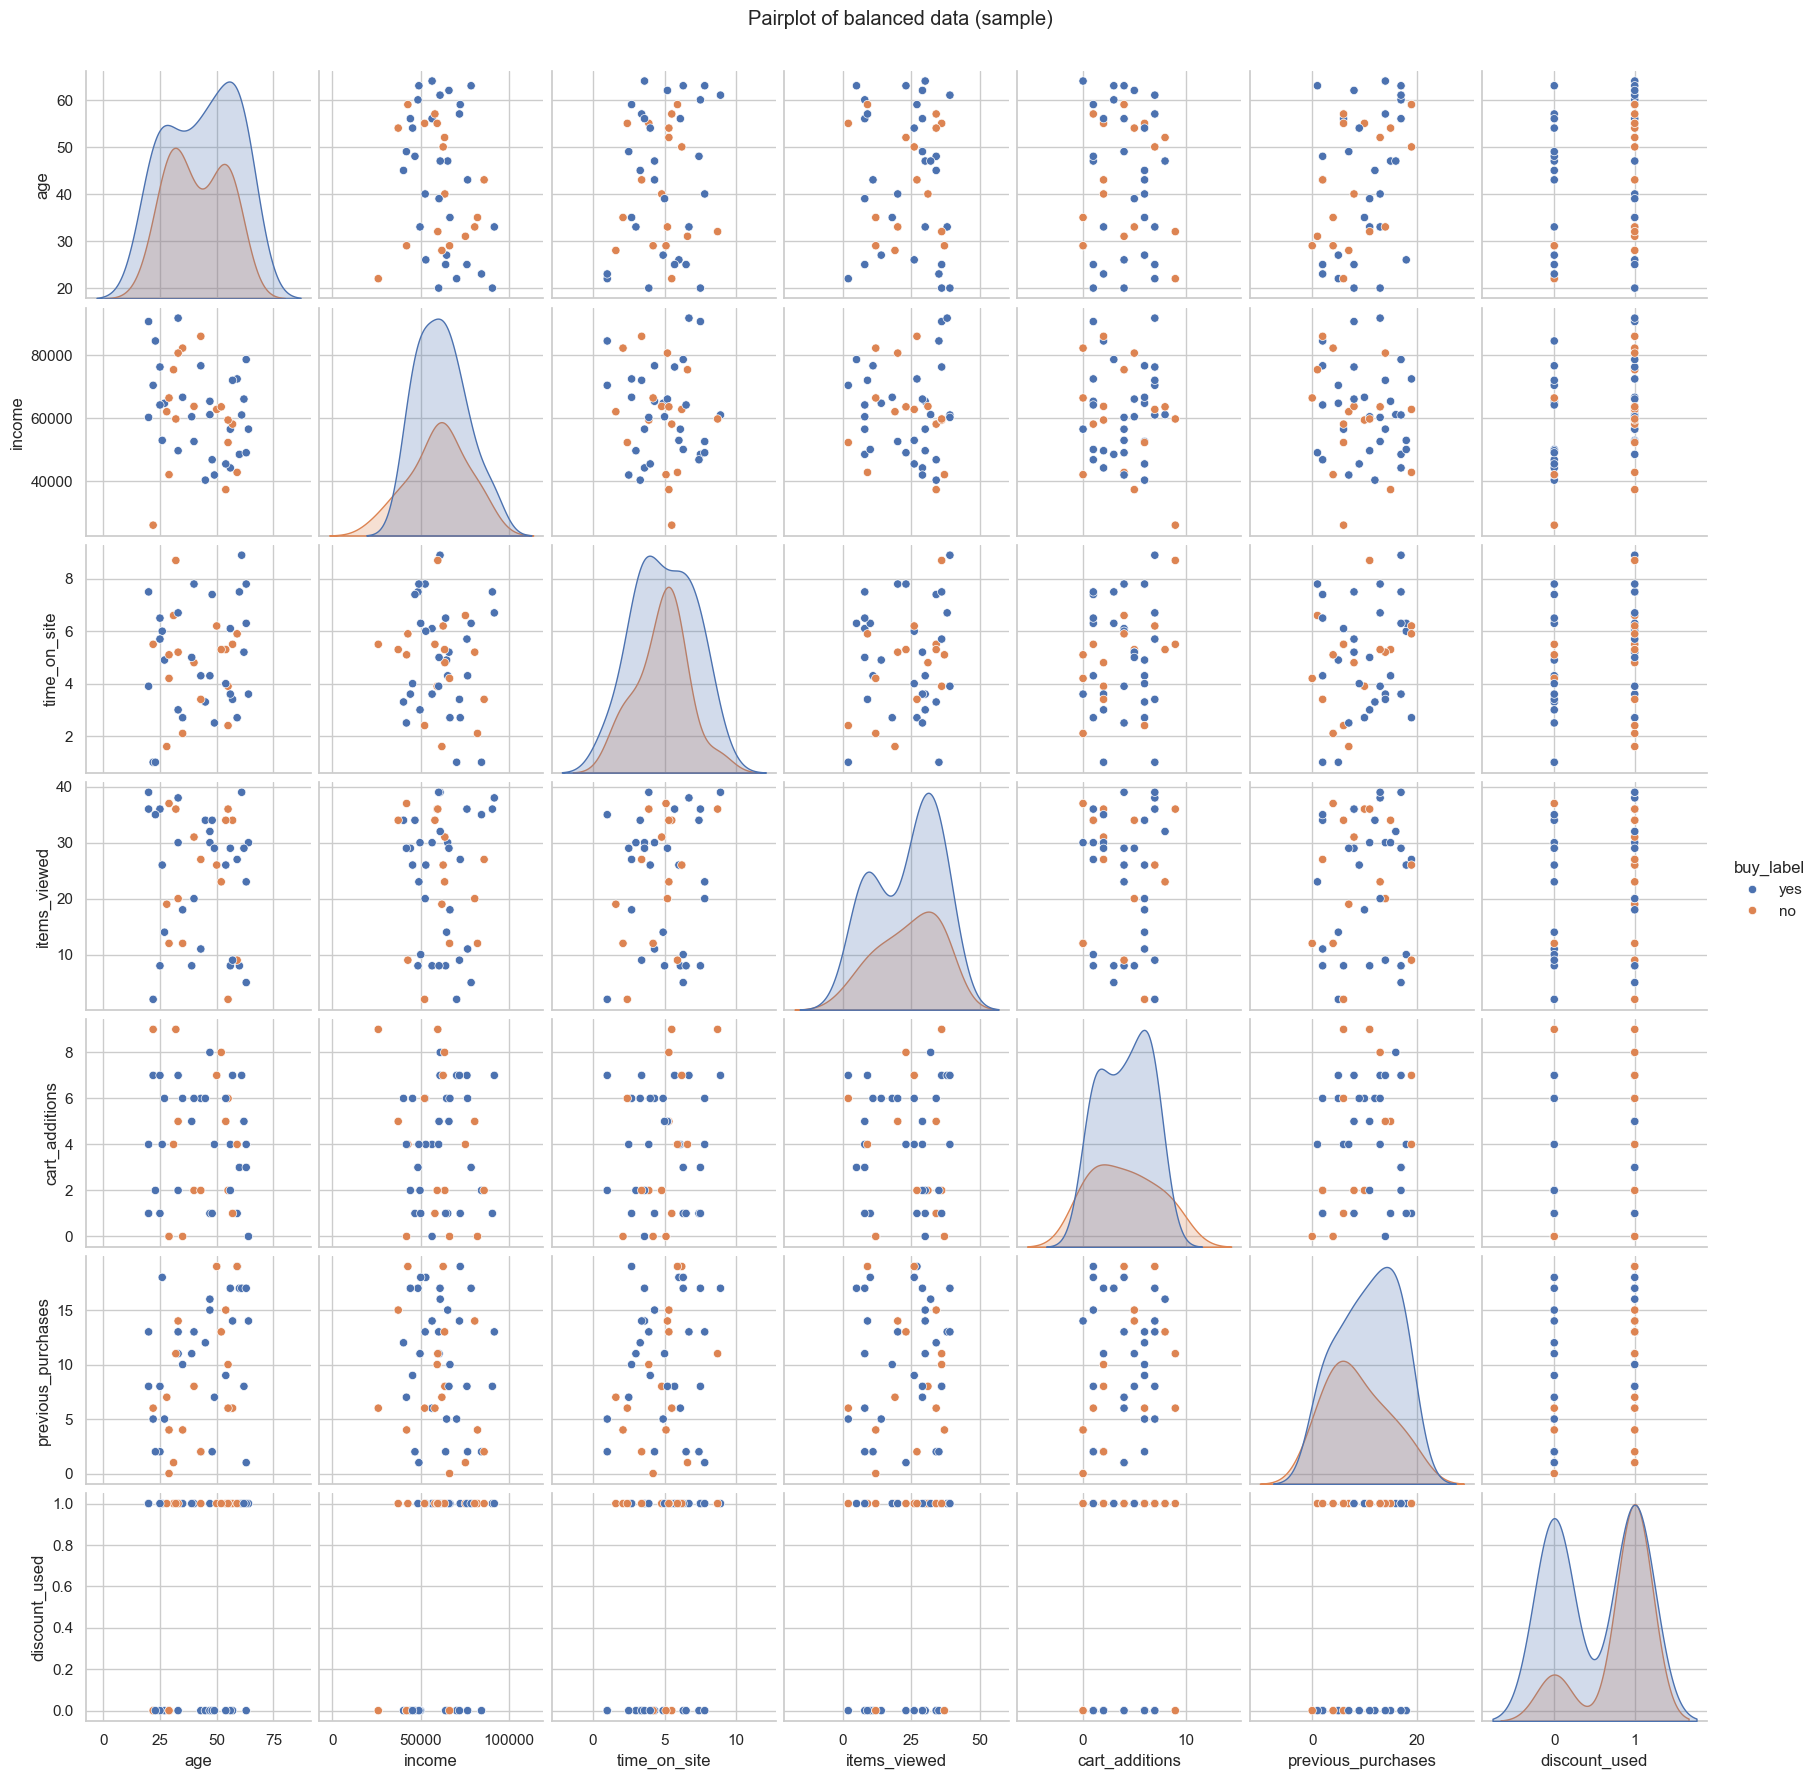

In [61]:
sns.pairplot(df.sample(min(50, len(df))), hue='buy_label')
plt.suptitle('Pairplot of balanced data (sample)', y=1.02)
plt.show()

# TRAINING

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = df.drop("buy_label", axis=1)
y = df["buy_label"]
X_train, X_test, y_train , y_test, = train_test_split(
    X , y , test_size=0.20, random_state = 42
)

In [64]:
X_train.shape

(160, 7)

In [65]:
y_train.shape

(160,)

In [66]:
X_test.shape

(40, 7)

In [67]:
y_test.shape

(40,)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=RANDOM_STATE
)

print("\nNaN check final:")
print("X_train:", X_train.isnull().sum().sum())
print("X_test:", X_test.isnull().sum().sum())


NaN check final:
X_train: 0
X_test: 0


## MODELING

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [77]:
print("NaN in y:", y.isnull().sum())
print("NaN in y_train:", y_train.isnull().sum())
print("NaN in y_test:", y_test.isnull().sum())


NaN in y: 3
NaN in y_train: 3
NaN in y_test: 0


In [78]:
y = y.fillna(y.mode()[0])  

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [80]:
df_majority = clean_df[clean_df['buy_label']=='yes']
df_minority = clean_df[clean_df['buy_label']=='no']


In [81]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
    'GradientBoosting': GradientBoostingClassifier(random_state=RANDOM_STATE),
    'SVC': SVC(probability=True, random_state=RANDOM_STATE)
}

from sklearn.metrics import accuracy_score
results = {}

for name, model in models.items():
    print(f'-- Training {name} --')
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = {'model': model, 'accuracy': acc}
    print(f'{name} accuracy: {acc:.4f}\n')

-- Training LogisticRegression --
LogisticRegression accuracy: 0.6250

-- Training KNeighbors --
KNeighbors accuracy: 0.6250

-- Training DecisionTree --
DecisionTree accuracy: 0.5750

-- Training RandomForest --
RandomForest accuracy: 0.5750

-- Training GradientBoosting --
GradientBoosting accuracy: 0.7250

-- Training SVC --
SVC accuracy: 0.6750



### PREDICTIONS

In [91]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Predictions
y_pred = best_model.predict(X_test)

print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=['no','yes']))
print('Precision:', precision_score(y_test, y_pred, pos_label='yes'))
print('Recall:', recall_score(y_test, y_pred, pos_label='yes'))
print('F1 Score:', f1_score(y_test, y_pred, pos_label='yes'))



Classification Report:
              precision    recall  f1-score   support

          no       0.60      0.46      0.52        13
         yes       0.77      0.85      0.81        27

    accuracy                           0.72        40
   macro avg       0.68      0.66      0.66        40
weighted avg       0.71      0.72      0.71        40

Precision: 0.7666666666666667
Recall: 0.8518518518518519
F1 Score: 0.8070175438596491


In [99]:
import pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print('\nSaved best model to best_model.pkl')

# ------------------------
# END
# ------------------------
print('\nPipeline complete.')


Saved best model to best_model.pkl

Pipeline complete.
